In [3]:
#기준은 23년으로 함
import pandas as pd

# CSV 파일 경로 지정
file_path1 = "경기도 수원시_주정차위반단속위치현황_20231201.csv"  # 예: "data.csv"
file_path2 = "상권정보/소상공인시장진흥공단_상가(상권)정보_경기_202312.csv"
file_path3 = "월별인구현황_2023년12월기준.xlsx"
file_path4 = "전국초중등학교위치표준데이터.csv"

주정차위반단속 = pd.read_csv(file_path1, encoding="cp949" )  # 한글 깨짐 방지용 encoding
상가 = pd.read_csv(file_path2)
인구현황 =pd.read_excel(file_path3 )
학교 = pd.read_csv(file_path4, encoding="cp949" )

# 데이터 확인
print(주정차위반단속.head())
print(상가.head())
print(인구현황.head())
print(학교.head())

C:\Users\somin\AppData\Local\Temp\ipykernel_21980\357910691.py:11: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  상가 = pd.read_csv(file_path2)
C:\Users\somin\anaconda3\Lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


   집계년도  시군명 관리기관명           단속일시정보   단속방법     데이터기준일자              단속장소
0  2022  수원시  권선구청  2022-01-01 0:33  국민신문고  2023-12-01      수원시 권선동 1124
1  2022  수원시  장안구청  2022-01-01 8:11    고정형  2023-12-01  수원시 하광교동 광교주차장입구
2  2022  수원시  권선구청  2022-01-01 8:48  국민신문고  2023-12-01    수원시 세류동 1159-2
3  2022  수원시  권선구청  2022-01-01 8:57  국민신문고  2023-12-01       수원시 구운동 583
4  2022  수원시  장안구청  2022-01-01 9:00    고정형  2023-12-01   수원시 영화동 장안문거북시장
                 상가업소번호               상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
0  MA0101202210A0101847  지제역부동산마트공인중개사사무소  NaN        L1      부동산      L102   
1  MA0101202210A0072309             디자인올타  NaN        M1    과학·기술      M112   
2  MA0101202210A0083536           좋아좋아메들리  NaN        I2       음식      I211   
3  MA0101202210A0071854                희야  NaN        I2       음식      I203   
4  MA0101202210A0058768           생곡메밀막국수  NaN        I2       음식      I201   

  상권업종중분류명 상권업종소분류코드    상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
0  부동산 서비스

### <주정차위반단속 데이터>

In [4]:
#수원시 데이터 및 2023년 필터링
주정차위반단속 = 주정차위반단속[주정차위반단속["집계년도"] == 2023]
주정차위반단속=주정차위반단속.drop(columns=["데이터기준일자"])

print(주정차위반단속.head())
print(len(주정차위반단속)) 

        집계년도  시군명 관리기관명           단속일시정보   단속방법                           단속장소
425002  2023  수원시  팔달구청  2023-01-01 0:23  국민신문고          수원시 우만동 509-11 (횡단보도)
425003  2023  수원시  권선구청  2023-01-01 1:52  국민신문고                수원시 오목천동 527-67
425004  2023  수원시  권선구청  2023-01-01 1:53  국민신문고                수원시 오목천동 527-67
425005  2023  수원시  팔달구청  2023-01-01 2:40  국민신문고   수원시 화서동 127-3 (버스정류장 10m 이내)
425006  2023  수원시  팔달구청  2023-01-01 3:28  국민신문고  수원시 인계동 1034-7 (교차로모퉁이 5m 이내)
369736


In [7]:
주정차위반단속_고정=주정차위반단속[주정차위반단속["단속방법"] == "고정형"]

In [9]:
print(주정차위반단속["관리기관명"].value_counts())
print(주정차위반단속["단속방법"].value_counts())

관리기관명
팔달구청    139670
권선구청    105628
영통구청     82233
장안구청     42205
Name: count, dtype: int64
단속방법
고정형      159142
주행형      105074
국민신문고     93044
보행        10319
주민신고제      2157
Name: count, dtype: int64


In [13]:
고유장소수_방법별 = 주정차위반단속.groupby("단속방법")["단속장소"].nunique()
print(고유장소수_방법별)

단속방법
고정형        547
국민신문고    15998
보행        3677
주민신고제     1132
주행형       2842
Name: 단속장소, dtype: int64


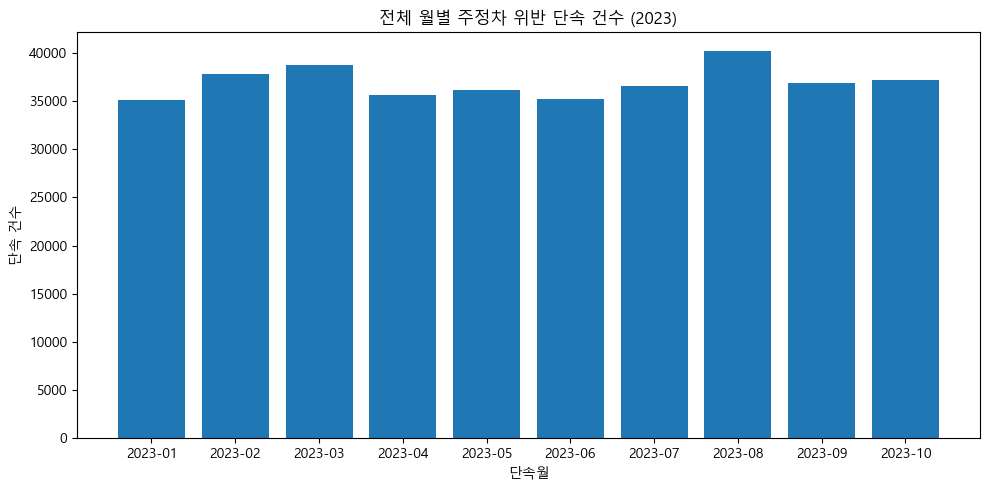

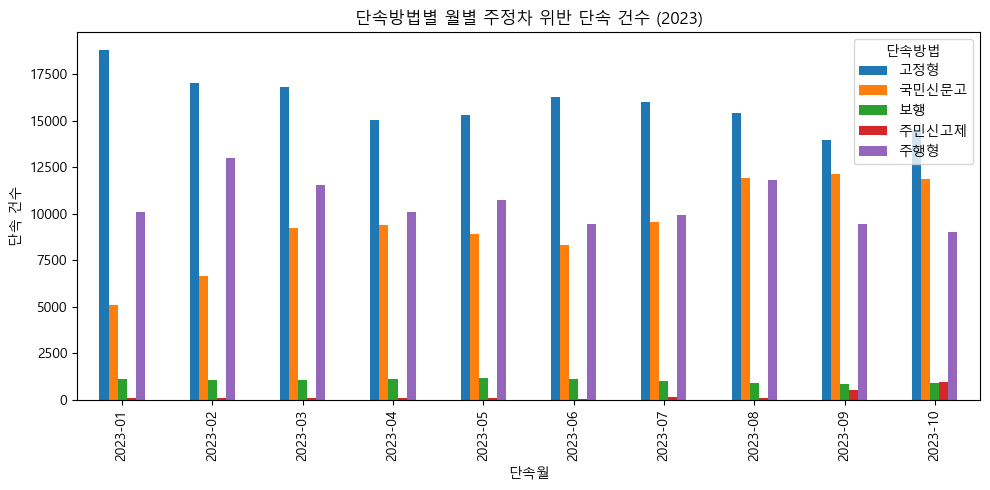

In [24]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# --- 한글 폰트 설정 (Windows: Malgun Gothic, Mac: AppleGothic)
mpl.rcParams['font.family'] = 'Malgun Gothic'  # Windows
mpl.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지

# 날짜 형식 변환
주정차위반단속["단속일시정보"] = pd.to_datetime(주정차위반단속["단속일시정보"])
주정차위반단속["단속월"] = 주정차위반단속["단속일시정보"].dt.to_period("M")  # 월 단위

# ---------------------------
# 1) 전체 월별 단속 건수
# ---------------------------
월별_counts = 주정차위반단속["단속월"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(월별_counts.index.astype(str), 월별_counts.values)
plt.xlabel("단속월")
plt.ylabel("단속 건수")
plt.title("전체 월별 주정차 위반 단속 건수 (2023)")
plt.tight_layout()
plt.show()

# ---------------------------
# 2) 단속방법별 월별 단속 건수
# ---------------------------
단속방법별_월별_counts = (
    주정차위반단속
    .groupby(["단속월", "단속방법"])
    .size()
    .unstack(fill_value=0)
)

단속방법별_월별_counts.index = 단속방법별_월별_counts.index.astype(str)

단속방법별_월별_counts.plot(kind="bar", figsize=(10, 5))
plt.xlabel("단속월")
plt.ylabel("단속 건수")
plt.title("단속방법별 월별 주정차 위반 단속 건수 (2023)")
plt.tight_layout()
plt.show()

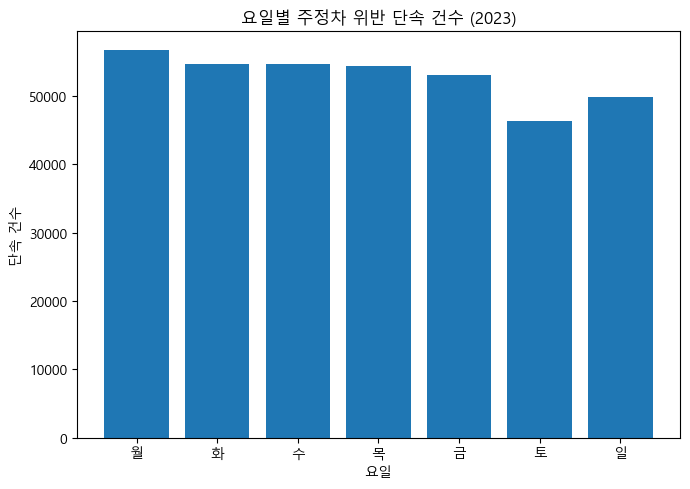

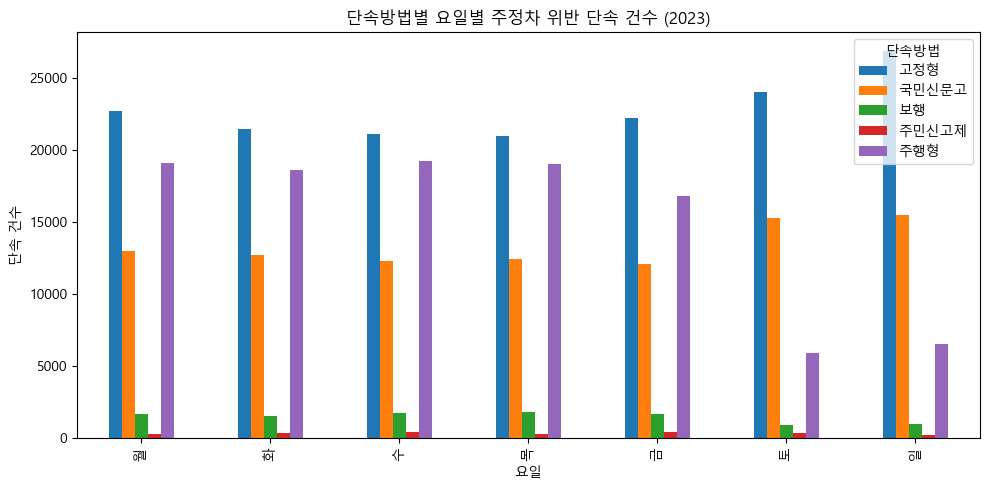

In [26]:
#요일별 단속 건수의 차이를 통해 유동적 주정차위반 시간을 요일을 결정할 수 있을것
import matplotlib as mpl

# 한글 폰트 설정
mpl.rcParams['font.family'] = 'Malgun Gothic'  # Windows
mpl.rcParams['axes.unicode_minus'] = False

# 날짜 → 요일 추출
주정차위반단속["단속일시정보"] = pd.to_datetime(주정차위반단속["단속일시정보"])
요일순서 = ["월", "화", "수", "목", "금", "토", "일"]
주정차위반단속["요일"] = 주정차위반단속["단속일시정보"].dt.dayofweek  # 0=월, 6=일
주정차위반단속["요일"] = 주정차위반단속["요일"].map({i:요일순서[i] for i in range(7)})

# ---------------------------
# 1) 전체 요일별 단속 건수
# ---------------------------
요일별_counts = 주정차위반단속["요일"].value_counts().reindex(요일순서)

plt.figure(figsize=(7, 5))
plt.bar(요일별_counts.index, 요일별_counts.values)
plt.xlabel("요일")
plt.ylabel("단속 건수")
plt.title("요일별 주정차 위반 단속 건수 (2023)")
plt.tight_layout()
plt.show()

# ---------------------------
# 2) 단속방법별 요일별 단속 건수
# ---------------------------
단속방법별_요일별_counts = (
    주정차위반단속
    .groupby(["요일", "단속방법"])
    .size()
    .unstack(fill_value=0)
    .reindex(요일순서)
)

단속방법별_요일별_counts.plot(kind="bar", figsize=(10, 5))
plt.xlabel("요일")
plt.ylabel("단속 건수")
plt.title("단속방법별 요일별 주정차 위반 단속 건수 (2023)")
plt.tight_layout()
plt.show()

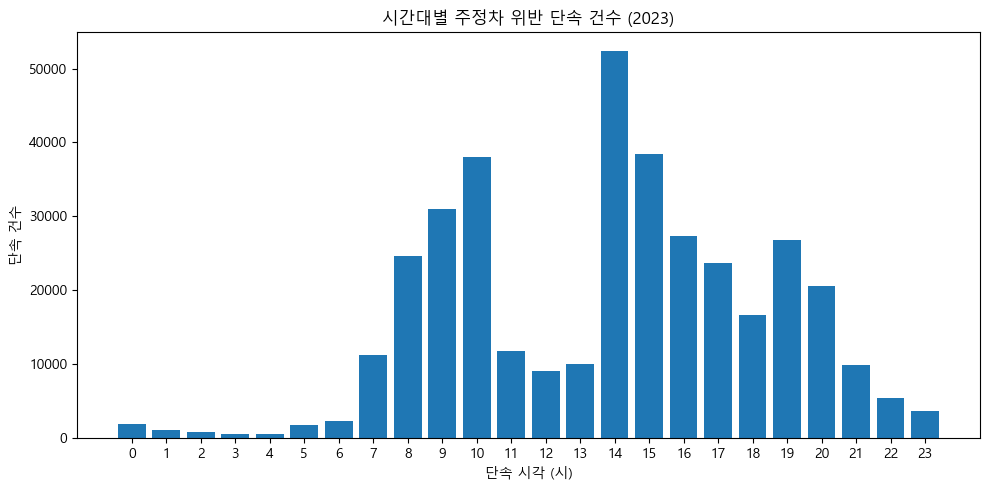

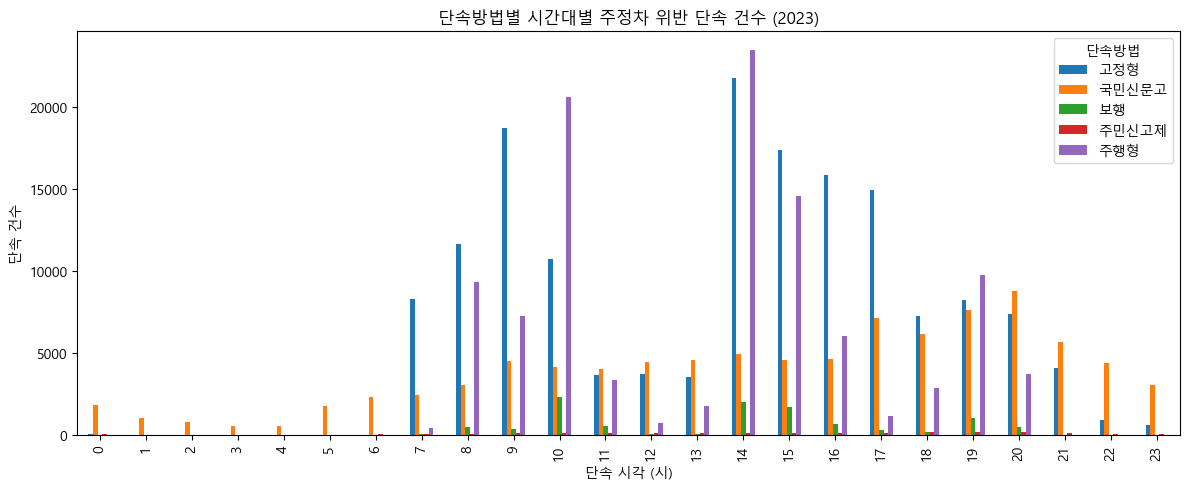

In [28]:
# 시간(hour) 추출
주정차위반단속["단속일시정보"] = pd.to_datetime(주정차위반단속["단속일시정보"])
주정차위반단속["단속시"] = 주정차위반단속["단속일시정보"].dt.hour

# ---------------------------
# 1) 전체 시간대별 단속 건수
# ---------------------------
시간별_counts = 주정차위반단속["단속시"].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.bar(시간별_counts.index, 시간별_counts.values)
plt.xticks(range(0, 24))
plt.xlabel("단속 시각 (시)")
plt.ylabel("단속 건수")
plt.title("시간대별 주정차 위반 단속 건수 (2023)")
plt.tight_layout()
plt.show()

# ---------------------------
# 2) 단속방법별 시간대별 단속 건수
# ---------------------------
단속방법별_시간별_counts = (
    주정차위반단속
    .groupby(["단속시", "단속방법"])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

단속방법별_시간별_counts.plot(kind="bar", figsize=(12, 5))
plt.xlabel("단속 시각 (시)")
plt.ylabel("단속 건수")
plt.title("단속방법별 시간대별 주정차 위반 단속 건수 (2023)")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()

### <상가 데이터>

In [32]:
#수원시 데이터 필터링
# '도로명주소' 열에 '수원' 포함된 행만 필터링
상가_수원 = 상가[상가["도로명주소"].str.contains("수원", na=False)]

# 결과 확인
print(상가_수원.head())
print(len(상가_수원)) 

                  상가업소번호           상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드  \
7   MA010120220805431348        월드할인마트  NaN        G2       소매      G204   
17  MA010120220805435750    가현세무법인수원지점  NaN        M1    과학·기술      M104   
36  MA010120220805437234         청하시스템  NaN        N1  시설관리·임대      N102   
44  MA010120220805439779        영성네트웍크  NaN        N1  시설관리·임대      N107   
66  MA010120220805445969  영가스파르타센터수원학원  NaN        P1       교육      P105   

   상권업종중분류명 상권업종소분류코드       상권업종소분류명 표준산업분류코드  ...                     건물관리번호  \
7     종합 소매    G20404           슈퍼마켓   G47129  ...  4111513800100710069054566   
17    회계·세무    M10402            세무사   M71202  ...  4111710500110090006001199   
36    청소·방제    N10201     건축물 일반 청소업   N74211  ...  4111312600111590002029809   
44    사무 지원    N10799  기타 사무 지원 서비스업   N75919  ...  4111513600100160005014548   
66    일반 교육    P10501        입시·교과학원   P85501  ...  4111710500109760014000719   

      건물명                   도로명주소   구우편번호  신우편번호  동정보  층

In [34]:
# 상권업종중분류코드 별 업종 수 집계
업종_개수 = 상가_수원["상권업종중분류코드"].value_counts()
print(업종_개수)

상권업종중분류코드
I201    5814
S207    3669
I210    3594
G209    2817
I212    2685
        ... 
S210      33
G203      26
M106      19
N103      19
I206       1
Name: count, Length: 75, dtype: int64
